## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [193]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [194]:
X = np.linspace(0,20,100)

In [195]:
a = -1
b = 2

y = a*X+b

#### Plot your data points. 

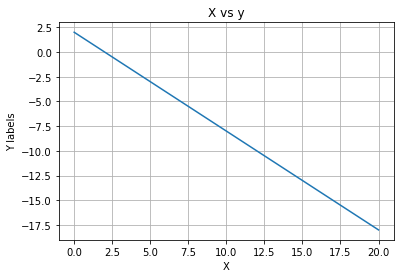

In [196]:
plt.grid()
plt.xlabel('X')
plt.ylabel('Y labels')
plt.title('X vs y')
plt.plot(X,y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [197]:
def GD(X,y,lr,iter):
    loss = []
    theta_0 = 0
    theta_1 = 0
    theta0_val = []
    theta1_val = []
    y_pred = []
    for i in range(iter):
        
        y_predict = theta_0+theta_1*X
        y_pred.append(y_predict)
        
        cost_fn = (1/(2*(len(X))))*np.sum((y_predict-y)**2)
        loss.append(cost_fn)
        
        grad_0 = (1/len(X))* np.sum((y_predict - y))
        grad_1 = (1/len(X))* np.sum((y_predict - y)*X)
        
        theta0_val.append(theta_0)
        theta1_val.append(theta_1)
        
        theta_0 = theta_0 - lr*grad_0 
        theta_1 = theta_1 - lr*grad_1
        
    return theta0_val,theta1_val,loss,y_pred,theta_0,theta_1

theta0_val,theta1_val,loss,y_pred,theta_0,theta_1 = GD(X,y,0.01,100)

In [198]:
from sklearn.metrics import r2_score
r2_score(y,y_pred[-1])

0.9807383484531593

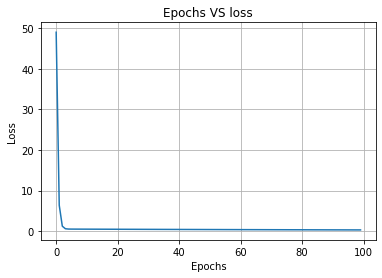

In [199]:
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs VS loss')
plt.plot(np.arange(0,100), loss)

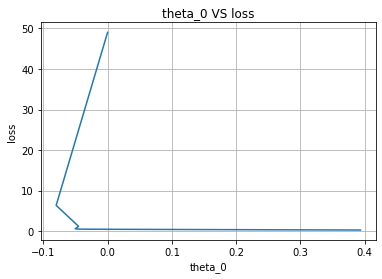

In [200]:
plt.grid()
plt.xlabel('theta_0')
plt.ylabel('loss')
plt.title('theta_0 VS loss')
plt.plot(theta0_val, loss)

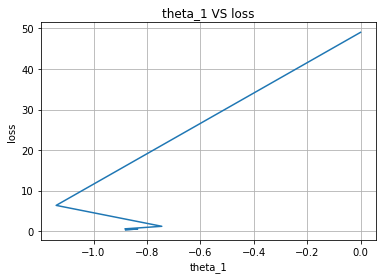

In [201]:
plt.grid()
plt.xlabel('theta_1')
plt.ylabel('loss')
plt.title('theta_1 VS loss')
plt.plot(theta1_val, loss)

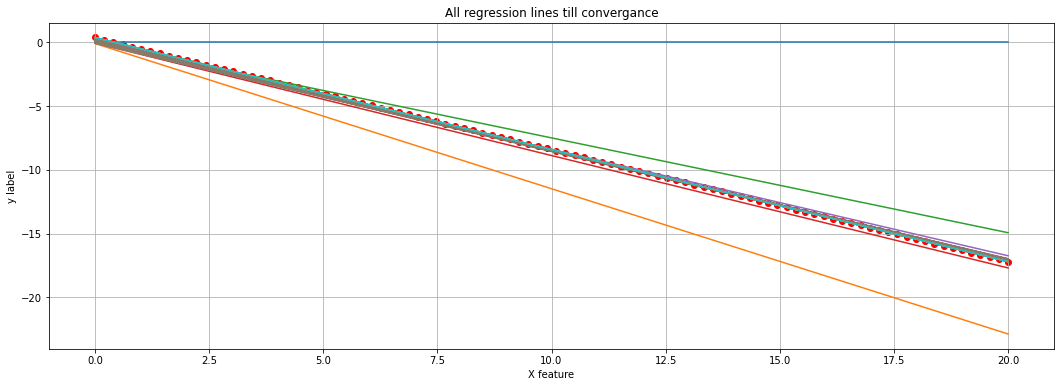

In [202]:
plt.figure(figsize=(18,6))
plt.grid()
plt.xlabel('X feature')
plt.ylabel('y label')
plt.title('All regression lines till convergance')
plt.scatter(X,y_pred[-1],c='r')
for i in range(100):
    plt.plot(X,y_pred[i])

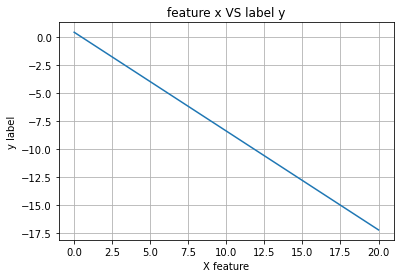

In [203]:
plt.grid()
plt.xlabel('X feature')
plt.ylabel('y label')
plt.title('feature x VS label y')
plt.plot(X, y_pred[-1])

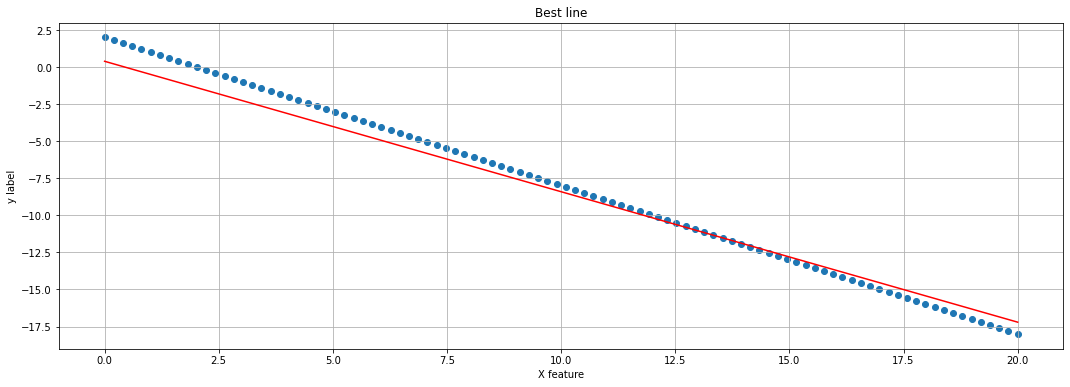

In [204]:
plt.figure(figsize=(18,6))
plt.grid()
plt.xlabel('X feature')
plt.ylabel('y label')
plt.title('Best line')
plt.scatter(X,y)
plt.plot(X, y_pred[-1],'r')

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

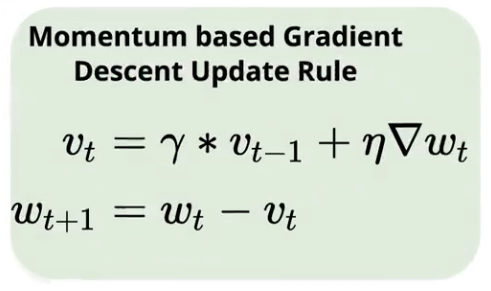

#### γ takes values between 0 and 1.
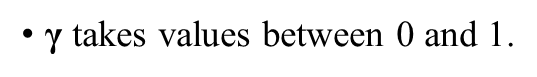

In [205]:
def Momentum_GD(X,y,lr,gamma,iter):
    loss = []
    
    theta_0 = 0
    theta_1 = 0
    
    v0 = 0
    v1 = 0
    
    theta0_val = []
    theta1_val = []
    
    y_pred = []
    for i in range(iter):
        
        y_predict = theta_0+theta_1*X
        y_pred.append(y_predict)
        
        cost_fn = (1/(2*(len(X))))*np.sum((y_predict-y)**2)
        loss.append(cost_fn)
        
        grad_0 = (1/len(X))* np.sum((y_predict - y))
        grad_1 = (1/len(X))* np.sum((y_predict - y)*X)
        
        v0 = gamma*v0 + lr*grad_0
        v1 = gamma*v1 + lr*grad_1
        
        theta0_val.append(theta_0)
        theta1_val.append(theta_1)
        
        theta_0 -= v0
        theta_1 -= v1
        
    return theta0_val,theta1_val,loss,y_pred,theta_0,theta_1
    

In [206]:
theta0_val,theta1_val,loss,y_pred,theta_0,theta_1 = Momentum_GD(X,y,0.01,0.9,100)
r2_score(y,y_pred[-1])

0.9999275835856944

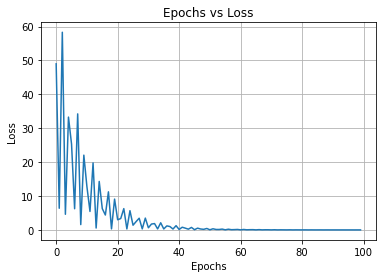

In [207]:
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.plot(np.arange(0,100),loss)

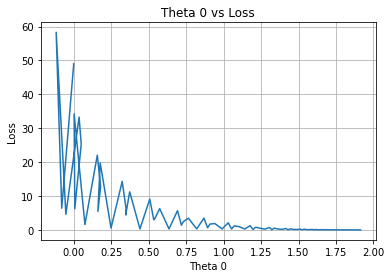

In [208]:
plt.grid()
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Theta 0 vs Loss')
plt.plot(theta0_val,loss)

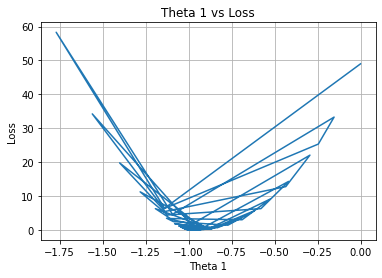

In [209]:
plt.grid()
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.title('Theta 1 vs Loss')
plt.plot(theta1_val,loss)

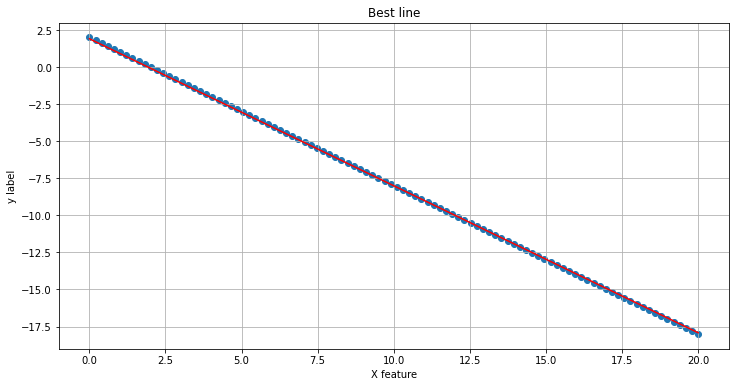

In [210]:
plt.figure(figsize=(12,6))
plt.grid()
plt.xlabel('X feature')
plt.ylabel('y label')
plt.title('Best line')
plt.scatter(X,y)
plt.plot(X, y_pred[-1],'r')

Text(0, 0.5, 'Theta 1')

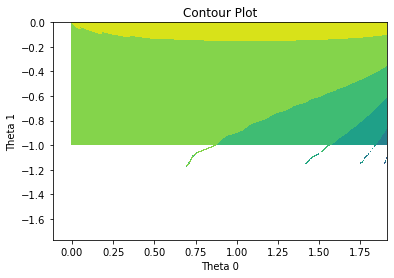

In [211]:
fig, ax = plt.subplots(1, 1)
[f1, f2] = np.meshgrid(theta0_val, theta1_val)
ax.contourf(f1, f2, f1+f2*X)
ax.set_title('Contour Plot')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [212]:
theta0_val,theta1_val,loss,y_pred,theta_0,theta_1 = Momentum_GD(X,y,0.01,0,100)
r2_score(y,y_pred[-1])

0.9807383484531593

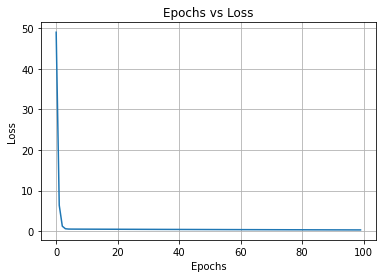

In [213]:
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.plot(np.arange(0,100),loss)

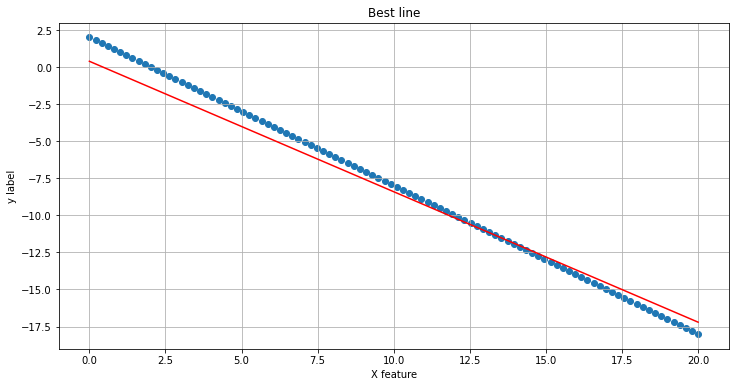

In [214]:
plt.figure(figsize=(12,6))
plt.grid()
plt.xlabel('X feature')
plt.ylabel('y label')
plt.title('Best line')
plt.scatter(X,y)
plt.plot(X, y_pred[-1],'r')

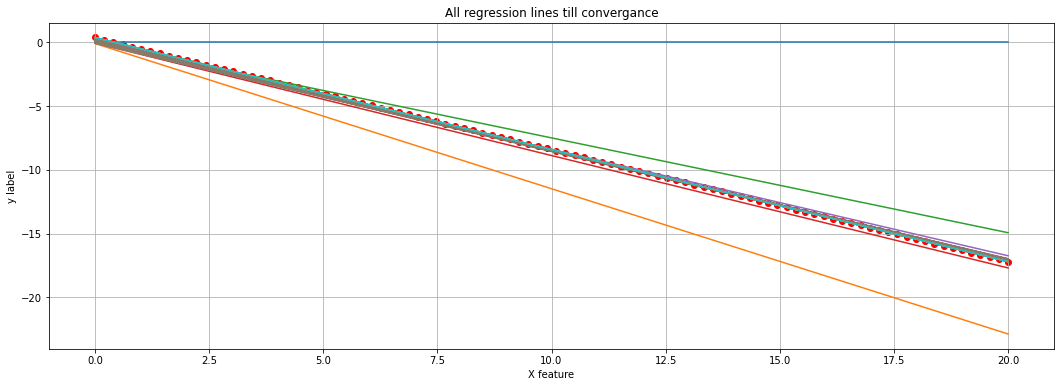

In [215]:
plt.figure(figsize=(18,6))
plt.grid()
plt.xlabel('X feature')
plt.ylabel('y label')
plt.title('All regression lines till convergance')
plt.scatter(X,y_pred[-1],c='r')
for i in range(100):
    plt.plot(X,y_pred[i])

### Update your Batch GD for one variable  implementation to be NAG and check your results

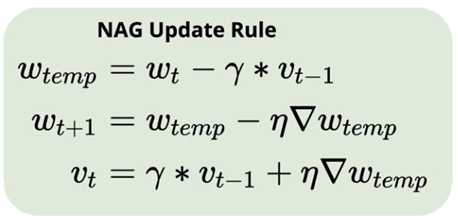

In [216]:
def NAG(X,y,lr,gamma,iter):
    loss = []
    
    theta_0 = 0
    theta_1 = 0
    
    v0 = 0
    v1 = 0
    
    theta0_val = []
    theta1_val = []
    
    y_pred = []
    for i in range(iter):
        
        y_predict = theta_0+theta_1*X
        y_pred.append(y_predict)
        
        cost_fn = (1/(2*(len(X))))*np.sum((y_predict-y)**2)
        loss.append(cost_fn)
        
        theta0_temp = theta_0 - gamma*v0
        theta1_temp = theta_1 - gamma*v1

        grad_0 = (1/len(X))* np.sum((y_predict - y))
        grad_1 = (1/len(X))* np.sum((y_predict - y)*X)
        
        theta0_val.append(theta_0)
        theta1_val.append(theta_1)
        
        theta_0 = theta0_temp - lr*grad_0
        theta_1 = theta1_temp - lr*grad_1
        
        v0 = gamma*v0 + lr*grad_0
        v1 = gamma*v1 + lr*grad_1
        
    return theta0_val,theta1_val,loss,y_pred,theta_0,theta_1
    

In [217]:
theta0_val,theta1_val,loss,y_pred,theta_0,theta_1 = NAG(X,y,0.0001,0.9,100)
r2_score(y,y_pred[-1])

0.9695944520704559

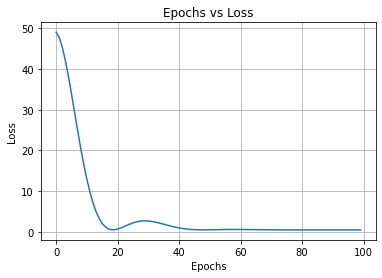

In [218]:
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.plot(np.arange(0,100),loss)

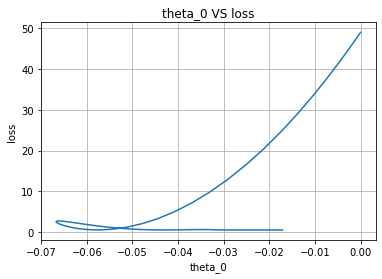

In [223]:
plt.grid()
plt.xlabel('theta_0')
plt.ylabel('loss')
plt.title('theta_0 VS loss')
plt.plot(theta0_val, loss)

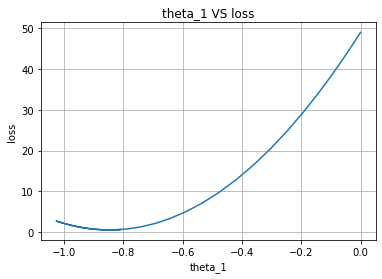

In [222]:
plt.grid()
plt.xlabel('theta_1')
plt.ylabel('loss')
plt.title('theta_1 VS loss')
plt.plot(theta1_val, loss)

Text(0, 0.5, 'Theta 1')

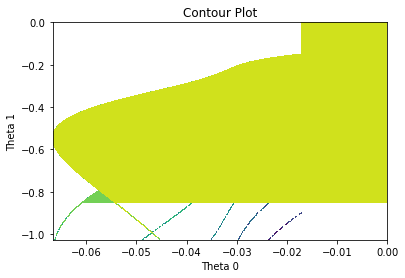

In [224]:
fig, ax = plt.subplots(1, 1)
[f1, f2] = np.meshgrid(theta0_val, theta1_val)
ax.contourf(f1, f2, f1+f2*X)
ax.set_title('Contour Plot')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')

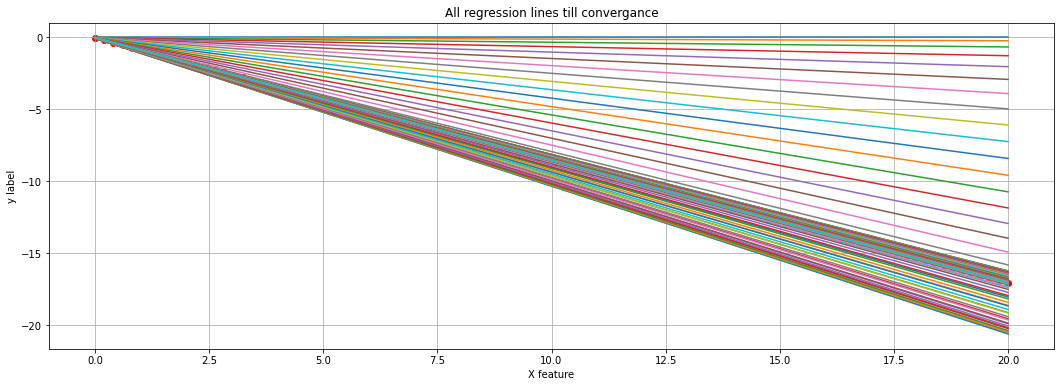

In [225]:
plt.figure(figsize=(18,6))
plt.grid()
plt.xlabel('X feature')
plt.ylabel('y label')
plt.title('All regression lines till convergance')
plt.scatter(X,y_pred[-1],c='r')
for i in range(100):
    plt.plot(X,y_pred[i])

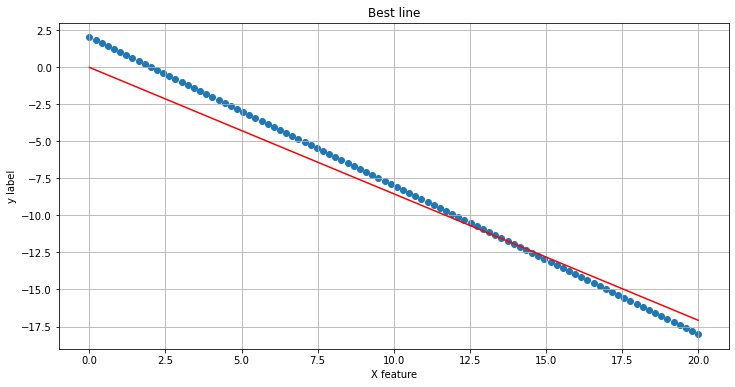

In [226]:
plt.figure(figsize=(12,6))
plt.grid()
plt.xlabel('X feature')
plt.ylabel('y label')
plt.title('Best line')
plt.scatter(X,y)
plt.plot(X, y_pred[-1],'r')

## Congratulations 
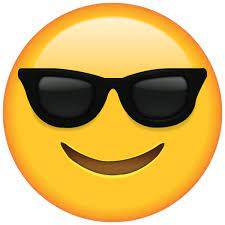